<a href="https://colab.research.google.com/github/Khushal21csu188/RLLAB-SEM-5/blob/main/RL_EXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GREEDY**

In [1]:
import random

def greedy_approach(lamp_durations):
    best_lamp = None
    max_duration = 0

    for lamp, duration in enumerate(lamp_durations):
        if duration > max_duration:
            max_duration = duration
            best_lamp = lamp

    return best_lamp

num_lamps = 5
lamp_durations = [random.randint(1, 10) for i in range(num_lamps)]  # Generate random durations
steps = 1000

total_reward = 0
for i in range(steps):
    chosen_lamp = greedy_approach(lamp_durations)
    reward = lamp_durations[chosen_lamp]
    total_reward += reward

average_reward = total_reward / steps
print("Average reward using Greedy Approach:", average_reward)
print("Lamp chosen",chosen_lamp)

Average reward using Greedy Approach: 10.0
Lamp chosen 1


**UCB**

Arm 0: Estimated Mean = 0.31745079082058447
Arm 1: Estimated Mean = 0.911016730671784
Arm 2: Estimated Mean = 0.19353884368078839
Arm 3: Estimated Mean = 0.3669125184005167
Arm 4: Estimated Mean = 0.22581573775389058


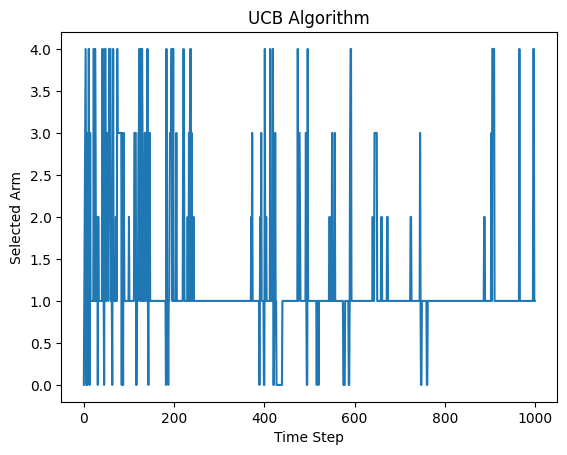

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms (bandit machines)
num_arms = 5

# True mean reward for each arm (unknown to the algorithm)
true_means = np.random.rand(num_arms)

# Number of time steps
num_steps = 1000

# Initialize variables for tracking rewards and action counts
total_rewards = np.zeros(num_arms)
action_counts = np.zeros(num_arms)

# Initialize the UCB values for each arm
ucb_values = np.zeros(num_arms)

# Initialize the list to store the history of selected arms
chosen_arms = []

# Exploration parameter (tune this value)
exploration_parameter = 2.0

# Run the UCB algorithm
for t in range(num_steps):
    # Select an arm based on UCB values
    selected_arm = np.argmax(ucb_values)

    # Simulate pulling the selected arm and observe the reward (sample from a Gaussian distribution with true mean)
    reward = np.random.normal(true_means[selected_arm], 1)

    # Update total rewards and action counts
    total_rewards[selected_arm] += reward
    action_counts[selected_arm] += 1

    # Update UCB values for all arms
    for arm in range(num_arms):
        if action_counts[arm] == 0:
            # If an arm hasn't been pulled yet, set its UCB value to a high value to encourage exploration
            ucb_values[arm] = float('inf')
        else:
            # Calculate UCB value for the arm
            mean_reward = total_rewards[arm] / action_counts[arm]
            exploration_bonus = exploration_parameter * np.sqrt(np.log(t + 1) / action_counts[arm])
            ucb_values[arm] = mean_reward + exploration_bonus

    # Record the selected arm for this time step
    chosen_arms.append(selected_arm)

# Print the estimated means for each arm
for arm in range(num_arms):
    estimated_mean = total_rewards[arm] / action_counts[arm]
    print(f"Arm {arm}: Estimated Mean = {estimated_mean}")

# Plot the results
plt.plot(chosen_arms)
plt.xlabel("Time Step")
plt.ylabel("Selected Arm")
plt.title("UCB Algorithm")
plt.show()

**OPTIMISTIC GREEDY**

In [3]:
import random

def optimistic_approach(lamp_durations):
    num_lamps = len(lamp_durations)
    estimated_durations = [10] * num_lamps  # Initialize with optimistic estimates
    chosen_lamp = None

    for lamp, _ in enumerate(lamp_durations):
        observed_duration = random.randint(1, 10)  # Generate random observed duration
        estimated_durations[lamp] = observed_duration

    for _ in range(steps):
        chosen_lamp = estimated_durations.index(max(estimated_durations))
        reward = lamp_durations[chosen_lamp]
        observed_duration = random.randint(1, 10)  # Generate random observed duration
        estimated_durations[chosen_lamp] = (estimated_durations[chosen_lamp] + observed_duration) / 2

    return chosen_lamp

num_lamps = 5
lamp_durations = [random.randint(1, 10) for _ in range(num_lamps)]  # Generate random durations
steps = 1000

total_reward = 0
for _ in range(steps):
    chosen_lamp = optimistic_approach(lamp_durations)
    reward = lamp_durations[chosen_lamp]
    total_reward += reward

average_reward = total_reward / steps
print("Average reward using Optimistic Approach:", average_reward)


Average reward using Optimistic Approach: 4.668


**EPSILON**

In [4]:
import random

def epsilon_greedy_approach(lamp_durations, epsilon):
    num_lamps = len(lamp_durations)
    chosen_lamp = None

    for _ in range(steps):
        if random.random() < epsilon:
            chosen_lamp = random.randint(0, num_lamps - 1)
        else:
            chosen_lamp = lamp_durations.index(max(lamp_durations))
        reward = lamp_durations[chosen_lamp]
        observed_duration = random.randint(1, 10)  # Generate random observed duration
        lamp_durations[chosen_lamp] = (lamp_durations[chosen_lamp] + observed_duration) / 2

    return chosen_lamp

num_lamps = 5
lamp_durations = [random.randint(1, 10) for _ in range(num_lamps)]  # Generate random durations
steps = 1000
exploration_probability = 0.1  # Set epsilon value

total_reward = 0
for _ in range(steps):
    chosen_lamp = epsilon_greedy_approach(lamp_durations, exploration_probability)
    reward = lamp_durations[chosen_lamp]
    total_reward += reward

average_reward = total_reward / steps
print("Average reward using Epsilon-Greedy Approach:", average_reward)


Average reward using Epsilon-Greedy Approach: 5.530795493411025
